In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

<h2>Import data set<h2>

In [3]:
data=pd.read_csv("complete_data.csv")
data
# 0 - Fibrilacion Atrial
# 1 - Congestión cardíaca
# 2 - Infarto al miocardio

,case,record,cond,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v,Unnamed: 0
0,p080120,3406983_0002,0,1.168396,0.004582,0.964767,0.009790,2.070072,0.000166,0.172803,0.000307,0.520330,0.000906,NaN
1,p080120,3406983_0003,0,1.047608,0.042369,0.802464,0.049698,2.090014,0.000189,0.154892,0.000404,0.468682,0.001764,NaN
2,p080120,3406983_0007,0,1.135748,0.032810,0.831941,0.067280,2.085422,0.000052,0.148726,0.000284,0.431369,0.001633,NaN
3,p080120,3406983_0009,0,1.089244,0.049727,0.849848,0.069910,2.091715,0.000124,0.178373,0.003703,0.485346,0.006567,NaN
4,p080120,3406983_0011,0,0.839026,0.103725,0.625933,0.097401,2.113146,0.003489,0.166810,0.002794,0.441605,0.007855,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,p093900,3830735_0011,1,0.781379,0.039406,0.604919,0.070200,2.088072,0.000423,0.212267,0.004820,0.552899,0.005583,7.0
15113,p093900,3830735_0013,1,0.742207,0.035708,0.617933,0.041877,2.093576,0.000966,0.185574,0.005470,0.482693,0.011504,8.0
15114,p093900,3830735_0019,1,0.516458,0.008824,0.305300,0.006787,2.075331,0.000292,0.250197,0.000718,0.448389,0.004131,9.0
15115,p094007,3433819_0001,1,1.432638,0.001476,1.410608,0.010145,2.057172,0.000205,0.253336,0.000756,0.586211,0.000665,0.0


<h2>Extract Non linear analysis<h2>

In [351]:
pathology = data[["cond","ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]
pathology[0:13619]

,cond,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v
0,0,1.168396,0.004582,0.964767,0.009790,2.070072,0.000166,0.172803,0.000307,0.520330,0.000906
1,0,1.047608,0.042369,0.802464,0.049698,2.090014,0.000189,0.154892,0.000404,0.468682,0.001764
2,0,1.135748,0.032810,0.831941,0.067280,2.085422,0.000052,0.148726,0.000284,0.431369,0.001633
3,0,1.089244,0.049727,0.849848,0.069910,2.091715,0.000124,0.178373,0.003703,0.485346,0.006567
4,0,0.839026,0.103725,0.625933,0.097401,2.113146,0.003489,0.166810,0.002794,0.441605,0.007855
...,...,...,...,...,...,...,...,...,...,...,...
13614,1,0.915903,0.020921,0.668000,0.016898,2.085416,0.000102,0.247309,0.002611,0.609834,0.000510
13615,1,0.961124,0.027265,0.737809,0.034508,2.076590,0.000122,0.241224,0.002111,0.604419,0.001037
13616,1,1.028513,0.013908,0.795484,0.020737,2.076425,0.000070,0.219565,0.000813,0.586943,0.000576
13617,1,1.119410,0.022302,0.951327,0.034992,2.074262,0.000064,0.234444,0.003980,0.595714,0.002652


<h2>Define train set and targets<h2>

In [429]:
a_f=pathology[pathology["cond"] ==0]
c_c=pathology[pathology["cond"] ==1]
m_i=pathology[pathology["cond"] ==2]

atrial_f=a_f[["ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]
congestive_h=c_c[["ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]
myocardial_i=m_i[["ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]

targets=a_f['cond'].tolist()+c_c['cond'].tolist()+m_i['cond'].tolist()
X=pd.concat([atrial_f,congestive_h,myocardial_i],ignore_index=True)
X

,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v
0,1.168396,0.004582,0.964767,0.009790,2.070072,0.000166,0.172803,0.000307,0.520330,0.000906
1,1.047608,0.042369,0.802464,0.049698,2.090014,0.000189,0.154892,0.000404,0.468682,0.001764
2,1.135748,0.032810,0.831941,0.067280,2.085422,0.000052,0.148726,0.000284,0.431369,0.001633
3,1.089244,0.049727,0.849848,0.069910,2.091715,0.000124,0.178373,0.003703,0.485346,0.006567
4,0.839026,0.103725,0.625933,0.097401,2.113146,0.003489,0.166810,0.002794,0.441605,0.007855
...,...,...,...,...,...,...,...,...,...,...
15112,0.419859,0.011154,0.300128,0.013148,2.126929,0.001293,0.173775,0.009783,0.349523,0.012590
15113,0.245454,0.006962,0.115138,0.001728,2.113415,0.002093,0.113914,0.005880,0.262313,0.008459
15114,1.405579,0.002696,1.373599,0.009849,2.077307,0.000036,0.291876,0.000557,0.573274,0.000320
15115,0.199680,0.029282,0.139802,0.025585,2.390605,0.050698,0.053848,0.006279,0.164920,0.022955


<h2>Histograms<h2>

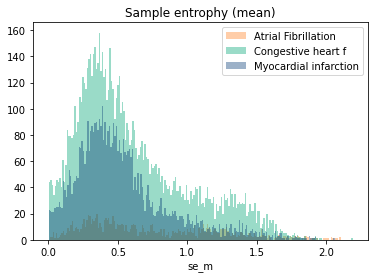

In [79]:
se_af=a_f["se_m"]
se_cc=c_c["se_m"]
se_mi=m_i["se_m"]


sn.distplot(a=se_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=se_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=se_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (mean)")
plt.legend()


(0.0, 0.4)

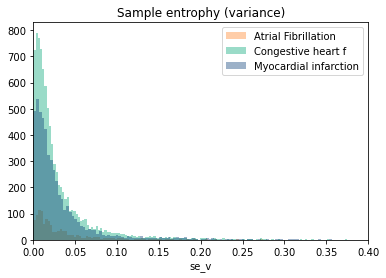

In [94]:
sev_af=a_f["se_v"]
sev_cc=c_c["se_v"]
sev_mi=m_i["se_v"]


sn.distplot(a=sev_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=sev_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=sev_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (variance)")
plt.legend()
plt.xlim(0, 0.4)

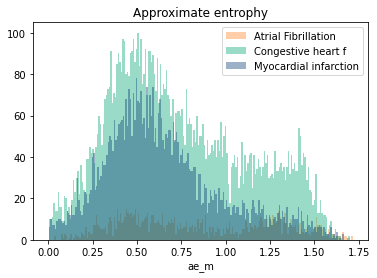

In [74]:
aem_af=a_f["ae_m"]
aem_cc=c_c["ae_m"]
aem_mi=m_i["ae_m"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aem_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aem_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aem_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (mean)")
plt.legend()


(0.0, 0.2)

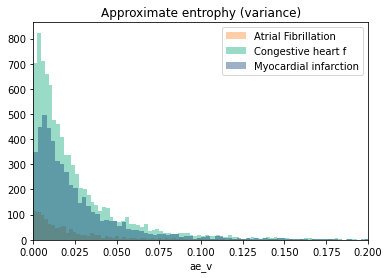

In [93]:
aev_af=a_f["ae_v"]
aev_cc=c_c["ae_v"]
aev_mi=m_i["ae_v"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aev_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aev_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aev_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (variance)")
plt.legend()
plt.xlim(0, 0.2)

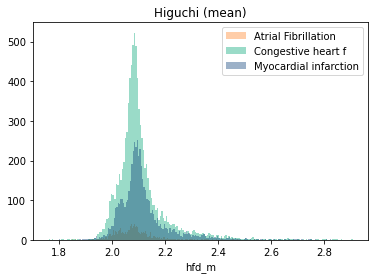

In [85]:
hfd_af=a_f["hfd_m"]
hfd_cc=c_c["hfd_m"]
hfd_mi=m_i["hfd_m"]


sn.distplot(a=hfd_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfd_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfd_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (mean)")
plt.legend()

(0.0, 0.015)

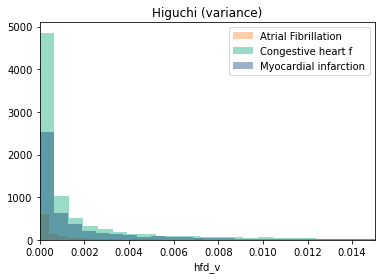

In [95]:
hfdv_af=a_f["hfd_v"]
hfdv_cc=c_c["hfd_v"]
hfdv_mi=m_i["hfd_v"]


sn.distplot(a=hfdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (variance)")
plt.legend()
plt.xlim(0, 0.015)

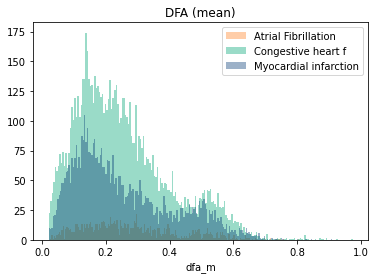

In [84]:
dfa_af=a_f["dfa_m"]
dfa_cc=c_c["dfa_m"]
dfa_mi=m_i["dfa_m"]


sn.distplot(a=dfa_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfa_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfa_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (mean)")
plt.legend()

(0.0, 0.04)

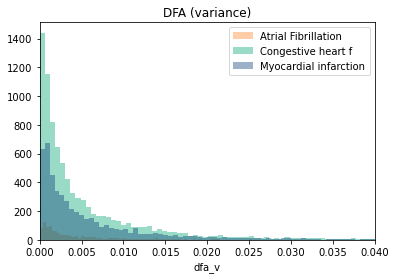

In [96]:
dfav_af=a_f["dfa_v"]
dfav_cc=c_c["dfa_v"]
dfav_mi=m_i["dfa_v"]


sn.distplot(a=dfav_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfav_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfav_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (variance)")
plt.legend()
plt.xlim(0, 0.04)

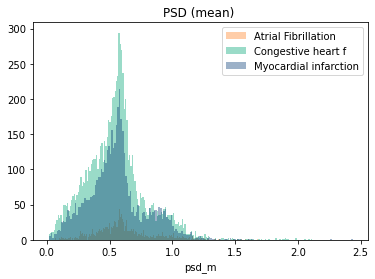

In [87]:
psd_af=a_f["psd_m"]
psd_cc=c_c["psd_m"]
psd_mi=m_i["psd_m"]


sn.distplot(a=psd_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psd_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psd_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (mean) ")
plt.legend()

(0.0, 0.2)

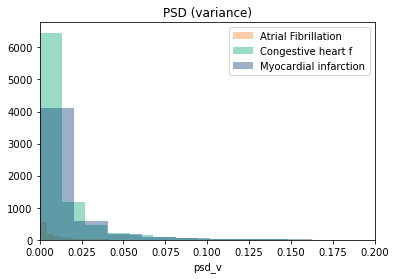

In [90]:
psdv_af=a_f["psd_v"]
psdv_cc=c_c["psd_v"]
psdv_mi=m_i["psd_v"]


sn.distplot(a=psdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (variance)")
plt.legend()
plt.xlim(0, 0.2)

<h2>Scatter plots<h2>

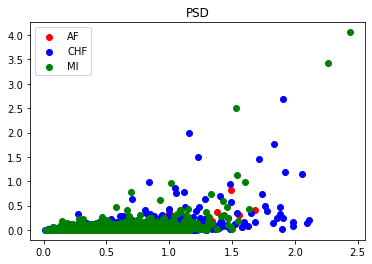

In [446]:
a=plt.scatter(atrial_f["psd_m"],atrial_f["psd_v"],color='red')
b=plt.scatter(congestive_h["psd_m"],congestive_h["psd_v"],color='blue')
c=plt.scatter(myocardial_i["psd_m"],myocardial_i["psd_v"],color='green')

plt.title("PSD")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

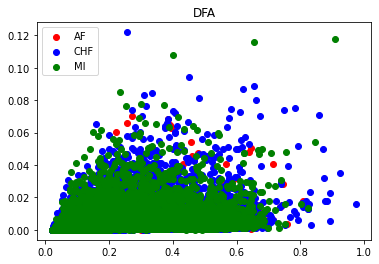

In [447]:
a=plt.scatter(atrial_f["dfa_m"],atrial_f["dfa_v"],color='red')
b=plt.scatter(congestive_h["dfa_m"],congestive_h["dfa_v"],color='blue')
c=plt.scatter(myocardial_i["dfa_m"],myocardial_i["dfa_v"],color='green')

plt.title("DFA")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

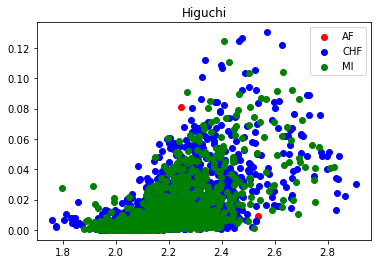

In [448]:
a=plt.scatter(atrial_f["hfd_m"],atrial_f["hfd_v"],color='red')
b=plt.scatter(congestive_h["hfd_m"],congestive_h["hfd_v"],color='blue')
c=plt.scatter(myocardial_i["hfd_m"],myocardial_i["hfd_v"],color='green')

plt.title("Higuchi")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

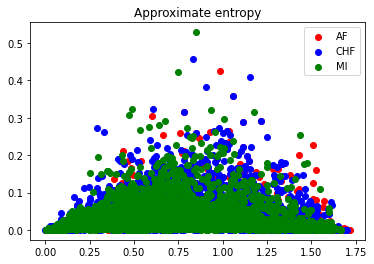

In [449]:
a=plt.scatter(atrial_f["ae_m"],atrial_f["ae_v"],color='red')
b=plt.scatter(congestive_h["ae_m"],congestive_h["ae_v"],color='blue')
c=plt.scatter(myocardial_i["ae_m"],myocardial_i["ae_v"],color='green')

plt.title("Approximate entropy")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

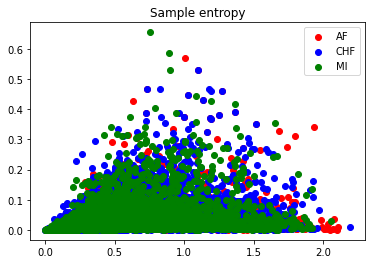

In [450]:
a=plt.scatter(atrial_f["se_m"],atrial_f["se_v"],color='red')
b=plt.scatter(congestive_h["se_m"],congestive_h["se_v"],color='blue')
c=plt.scatter(myocardial_i["se_m"],myocardial_i["se_v"],color='green')

plt.title("Sample entropy")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

<h2>Train and datasets<h2>

In [430]:
X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))

12093
12093


<h2>Logistic regression function<h2>

In [417]:
logistic_regression= LogisticRegression(max_iter=20000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

<h2>Confussion matrix<h2>

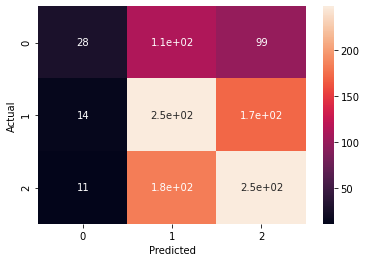

In [418]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Accuracy<h2>

In [393]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.4578096947935368


<h2>K nearest neightbors<h2>

In [422]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

knn.kneighbors_graph()

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.47


<h2>Gaussian Naive Bayes<h2>

In [395]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 1114 points : 650
Accuracy :  0.4165170556552962


<h2>Complement Naive Bayes<h2>

In [396]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()
y_pred = cnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 1114 points : 646
Accuracy :  0.42010771992818674


<h2>Multinomial Naive Bayes<h2>

In [397]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 1114 points : 645
Accuracy :  0.42100538599640935


<h2>Bernoulli Naive Bayes<h2>

In [398]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 1114 points : 681
Accuracy :  0.38868940754039494


<h2>Multi-layer Perceptron<h2>

0.5929232804232805


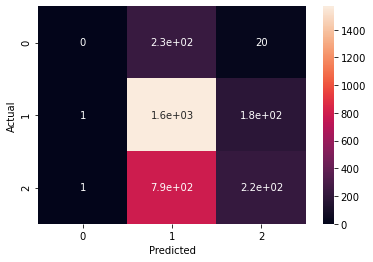

In [434]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=1,max_iter=20000)
clf.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)

print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)